In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

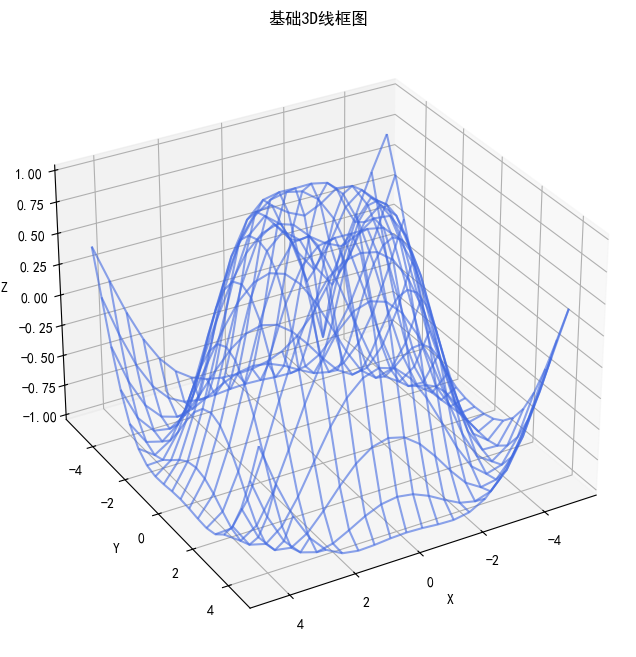

In [3]:
# 创建画布和3D坐标系
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 生成数据
x = np.arange(-5, 5, 0.5)
y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2)) # 计算Z值，一个径向正弦波

# 绘制线框图
ax.plot_wireframe(X, Y, Z,          # 三维数据
                  rcount=20,        # 沿行方向的网格线数量，值越小线越稀疏
                  ccount=20,        # 沿列方向的网格线数量，值越小线越稀疏
                  color='royalblue',# 网格线的颜色
                  linewidth=1.5,    # 网格线的宽度
                  alpha=0.6         # 网格线的透明度
                 )
# 设置视角
ax.view_init(elev=30, azim=60)

# 设置标签和标题
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('基础3D线框图')

plt.show()

# 2、使用示例：

### 示例 1：控制线框密度

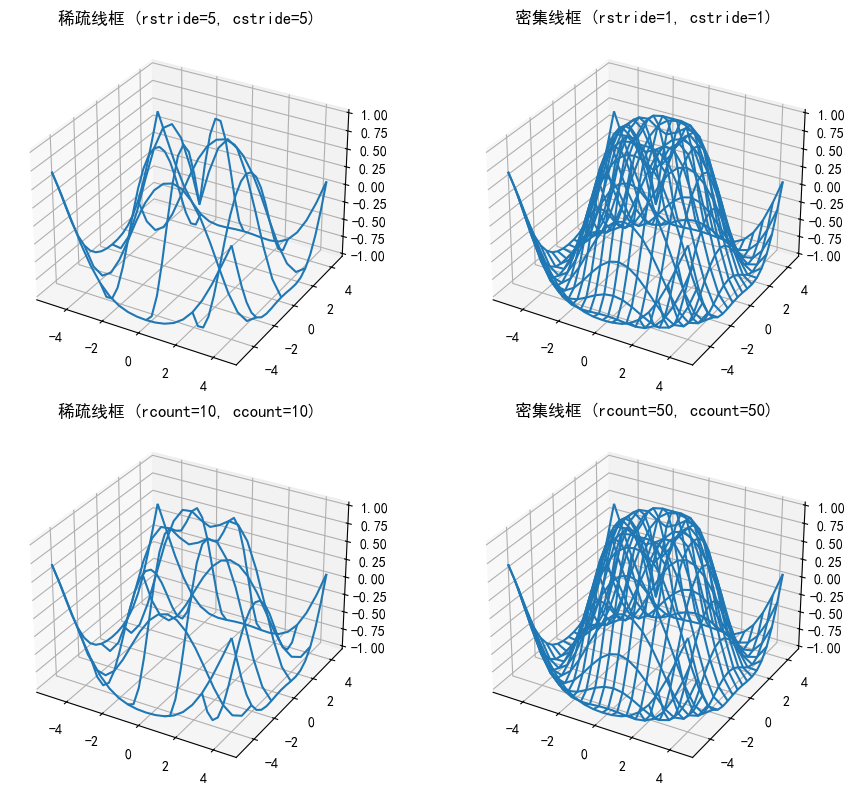

In [4]:
fig = plt.figure(figsize=(10, 8))

# 生成数据
x = np.arange(-5, 5, 0.5)
y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2)) # 计算Z值，一个径向正弦波

# 稀疏线框（步长为5）
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
ax1.set_title('稀疏线框 (rstride=5, cstride=5)')

# 密集线框（步长为1）
ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
ax2.set_title('密集线框 (rstride=1, cstride=1)')

# 稀疏线框（行和列方向各绘制5条线）
ax2 = fig.add_subplot(223, projection='3d')
ax2.plot_wireframe(X, Y, Z, rcount=5, ccount=5)
ax2.set_title('稀疏线框 (rcount=10, ccount=10)')

# 密集线框（行和列方向各绘制50条线）
ax2 = fig.add_subplot(224, projection='3d')
ax2.plot_wireframe(X, Y, Z, rcount=50, ccount=50)
ax2.set_title('密集线框 (rcount=50, ccount=50)')

plt.tight_layout()
plt.show()

## 示例 2：axlim_clip参数

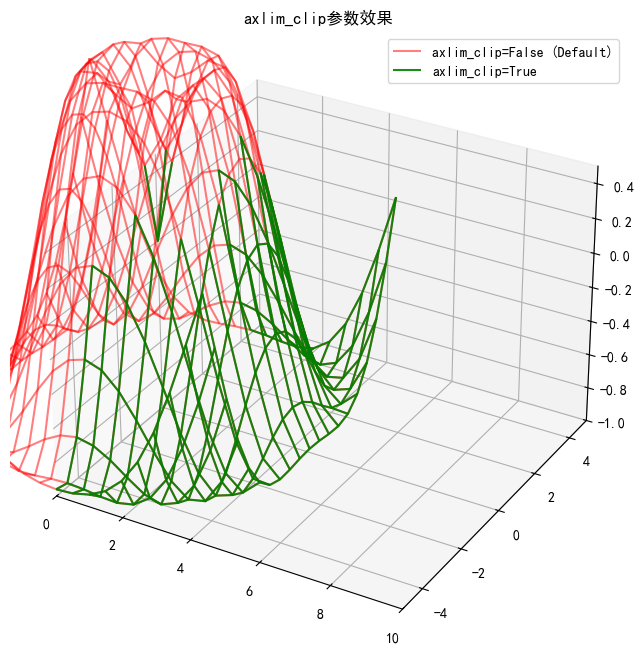

In [5]:
# 创建画布和3D坐标系
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

# 生成数据
x = np.arange(-5, 5, 0.5)
y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2)) # 计算Z值，一个径向正弦波

# 绘制两个线框图用于对比
# 第一个，不裁剪，线条会穿出坐标系
ax.plot_wireframe(X, Y, Z, color='red', alpha=0.5, label='axlim_clip=False (Default)')

# 第二个，启用裁剪，图形更整洁
ax.plot_wireframe(X, Y,  Z,color='green', alpha=0.9, axlim_clip=True, label='axlim_clip=True')

ax.set(xlim=(0, 10), ylim=(-5, 5), zlim=(-1, 0.5))

ax.legend() # 显示图例
ax.set_title('axlim_clip参数效果')
plt.show()

## 示例 3：与其他3D图表结合

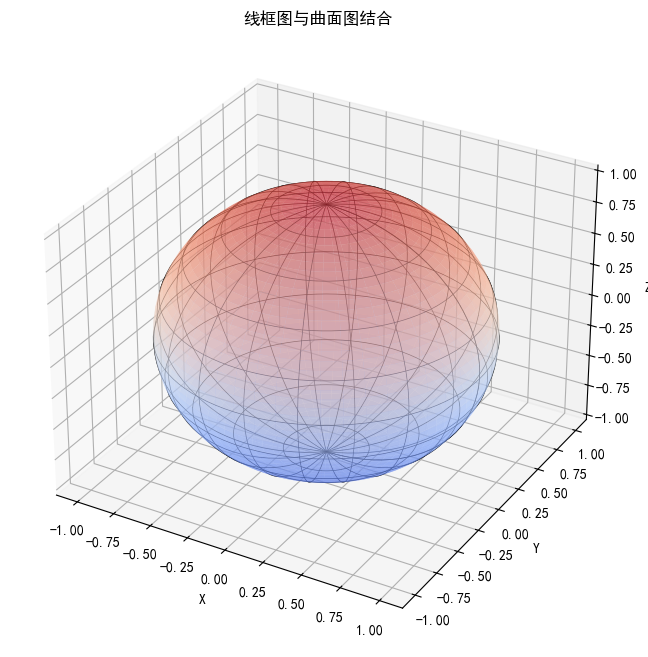

In [6]:
from matplotlib import cm

# 生成球体的参数
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 50)
theta, phi = np.meshgrid(theta, phi)

# 球体的三维坐标
r = 1
x = r * np.sin(phi) * np.cos(theta)
y = r * np.sin(phi) * np.sin(theta)
z = r * np.cos(phi)

# 创建3D图形并绘制线框图
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

# 绘制曲面图
surf = ax.plot_surface(x, y, z,cmap=cm.coolwarm, 
                       alpha=0.5, antialiased=True)
# 绘制线框图
ax.plot_wireframe(x, y, z, rstride=5, cstride=5, 
                         color='black', linewidth=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('线框图与曲面图结合')
plt.show()